In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
d=pd.read_csv("/content/AirPassengers.csv")
d

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
d.dtypes

,0
Month,object
#Passengers,int64


In [10]:
d.shape

(144, 2)

In [11]:
d.isnull().sum()

,0
Month,0
#Passengers,0


In [21]:
d['Month'] = pd.to_datetime(d.index)
d.set_index('Month', inplace=True)

In [22]:
d.dtypes

,0
#Passengers,int64


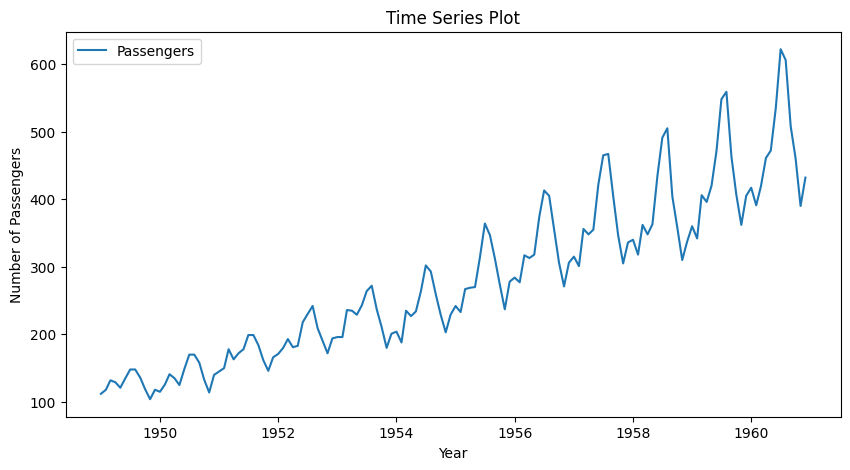

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(d.index, d['#Passengers'], label='Passengers')
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("Time Series Plot")
plt.legend()
plt.show()

In [24]:
pip install statsmodels

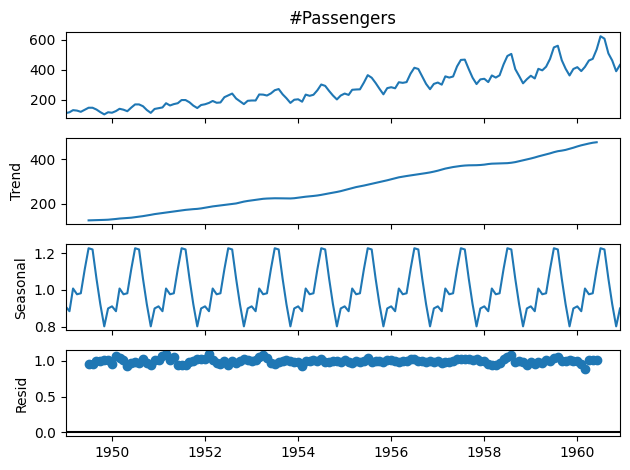

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(d['#Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler
s= MinMaxScaler()
data = d['#Passengers'].values.reshape(-1, 1)
scaled_data = s.fit_transform(d)

In [37]:
scaled_data.shape

(144, 1)

In [38]:
x=[]
y=[]
def create_seq(df,b):
    for i in range(len(df)-b):
        x.append(df[i:i+b])
        y.append(df[b+i])

In [39]:
create_seq(scaled_data,12)

In [40]:
x,y=np.array(x),np.array(y)

In [41]:
x.shape

(132, 12, 1)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [43]:
model = Sequential([
    LSTM(100, activation='tanh', input_shape=(x.shape[1], x.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=100, batch_size=8, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0687 - val_loss: 0.0325
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0140 - val_loss: 0.0293
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - val_loss: 0.0241
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090 - val_loss: 0.0230
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0070 - val_loss: 0.0224
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0071 - val_loss: 0.0217
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0213
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064 - val_loss: 0.0245
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081 - val_loss: 0.0204
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - val_loss: 0.0231
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - val_loss: 0.0209
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


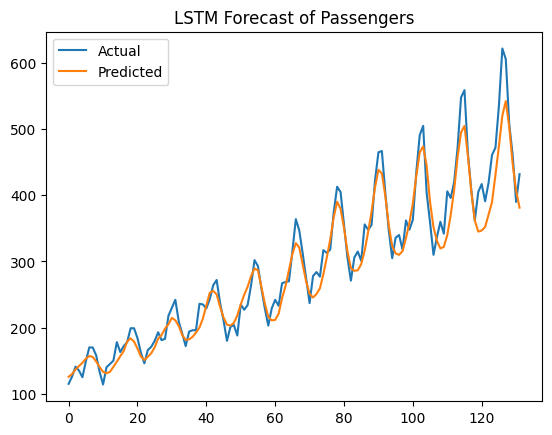

In [44]:
y_pred = model.predict(x)
y_pred_inv = scaler.inverse_transform(y_pred)
y_true_inv = scaler.inverse_transform(y)

plt.plot(y_true_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('LSTM Forecast of Passengers')
plt.show()